## AGENDA: Finding Insights from the Given Dataset for Aerofit for Recommending Product for a given customer.

I've carried out my Analysis to understand requirements for different customers in the Dataset and made few recommendations based on the insights generated through the Analysis.

The following was the given description of the dataset columns and product information.

• Product Purchased:	KP281, KP481, or KP781

• Age:	In years

• Gender:	Male/Female

• Education:	In years

• MaritalStatus:	Single or partnered

• Usage:	The average number of times the customer plans to use the treadmill each week.

• Income:	Annual income (in $)

• Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

• Miles:	The average number of miles the customer expects to walk/run each week

Product Portfolio:

   • The KP281 is an entry-level treadmill that sells for $1,500.
   
   • The KP481 is for mid-level runners that sell for $1,750.
   
   • The KP781 treadmill is having advanced features that sell for $2,500.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as sp
%matplotlib inline

1. Loading Dataset and some exploration.

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Observation : Our Dataset doesn't have null values

In [5]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

2. Understanding Categorical Variables

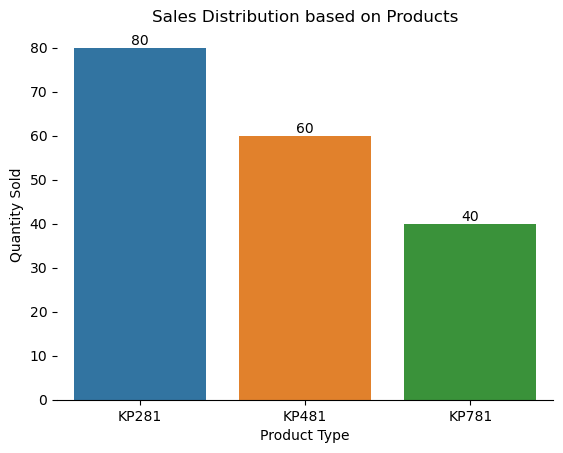

In [6]:
product = df.Product.value_counts()
ax = sns.barplot(x = product.index, y = product.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Product Type');
plt.ylabel('Quantity Sold');
plt.title('Sales Distribution based on Products');
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: KP 281 has been sold the most, followed by KP 481 and then KP 781

In [7]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

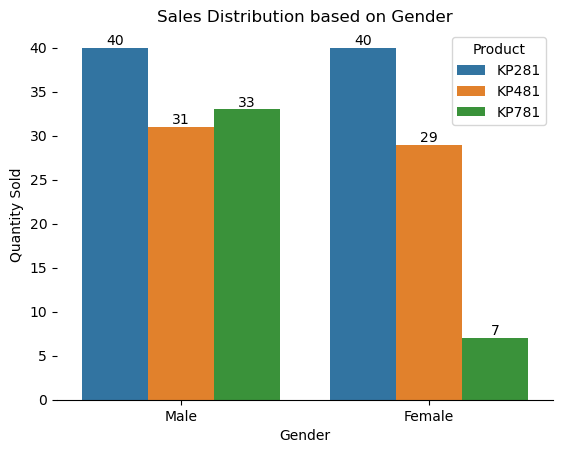

In [8]:

ax = sns.countplot(x = 'Gender', data = df, hue = 'Product')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Gender');
plt.ylabel('Quantity Sold');
plt.title('Sales Distribution based on Gender');
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: It can be observed that we have almost similar product preference for KP 281 & KP 481 but there is a difference in sales of KP 781 in Males and Females.

In [10]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

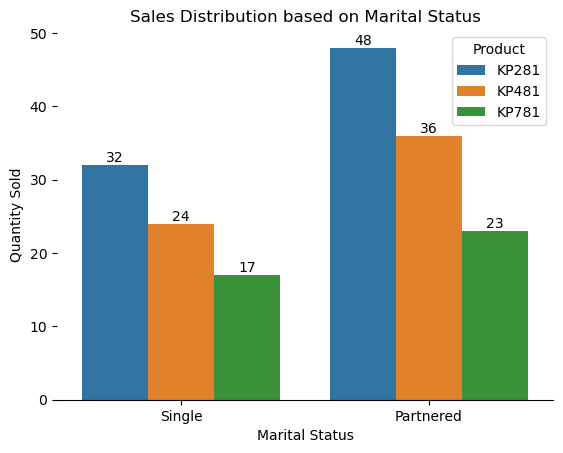

In [11]:
ax = sns.countplot(x = 'MaritalStatus', data = df, hue = 'Product')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Marital Status');
plt.ylabel('Quantity Sold');
plt.title('Sales Distribution based on Marital Status');
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: Almost 60% are Partnered and 40% are Single. Interestingly, the trend is same across Products i.e. all product follow this ratio of 60 - 40.

3. Understanding Numerical Variables

In [12]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


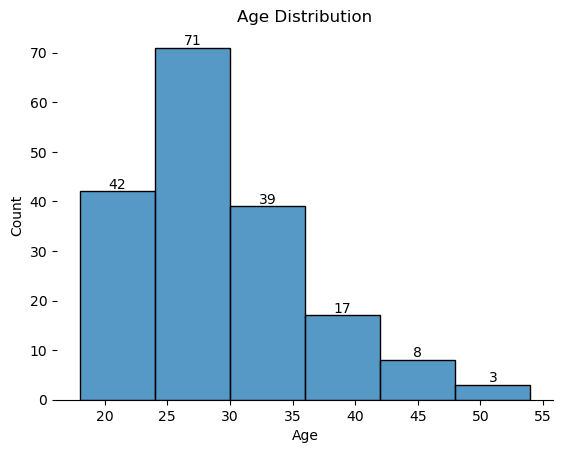

In [13]:
ax = sns.histplot(df['Age'], binwidth= 6, kde=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Age Distribution');
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: Almost 70 % of population is aged 30 or less whereas customers aged more than 40 are only 15%.

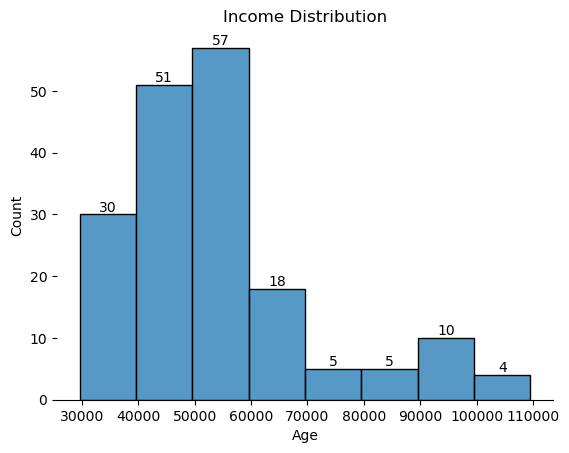

In [15]:
ax= sns.histplot(x = 'Income', data = df, binwidth = 10000);
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Income Distribution');
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: More than 75% of population is claimed to have annual income of $60,000.00 or less.

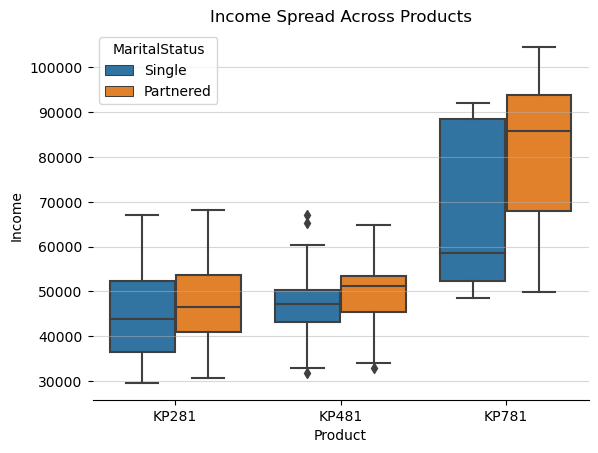

In [35]:
ax= sns.boxplot(y= 'Income', data = df, x = 'Product', hue = 'MaritalStatus');
plt.title('Income Spread Across Products');
ax.yaxis.grid(True, alpha = 0.5)
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: 
KP 281 customers have income ranging from 30000  and 70000 with IQR of 15000. 

KP 481 customers have income ranging from 35000  and 65000 with IQR of 7000. 

KP 781 customers have income ranging from 60000 with maximum of 105000  and 45000.

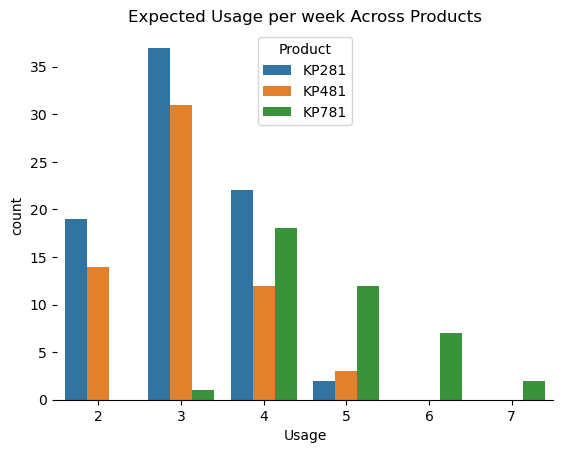

In [25]:
ax = sns.countplot(data= df, x = 'Usage', hue = 'Product');
plt.title('Expected Usage per week Across Products')
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation:
It can be clearly observed that the customer have bought KP 781 are expected to use the product more than 4 times per day. Majority of customers who bought KP 281 are expected to use the product less than 3 times a week. The same is true for KP 481

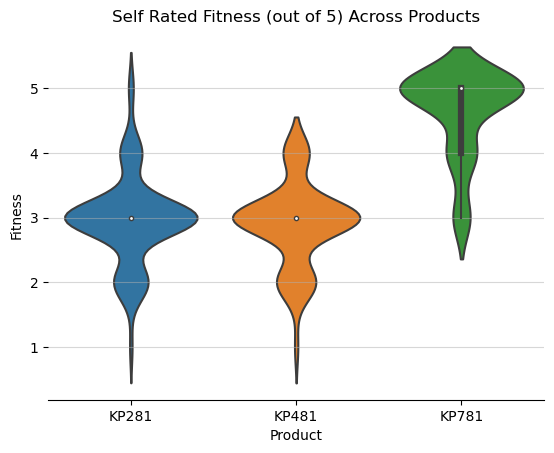

In [28]:
ax= sns.violinplot(x= 'Product', y = 'Fitness', data = df);
plt.title('Self Rated Fitness (out of 5) Across Products');
ax.yaxis.grid(True, alpha = 0.5);
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: 
Median Fitness of KP 281 and KP 481 is 3 out of 5 while its 5 out of 5 for KP 781 customers. Fitness Levels are almost similar for KP 281 and KP 481 at medium level however KP 781 customers are highly fit statistically.

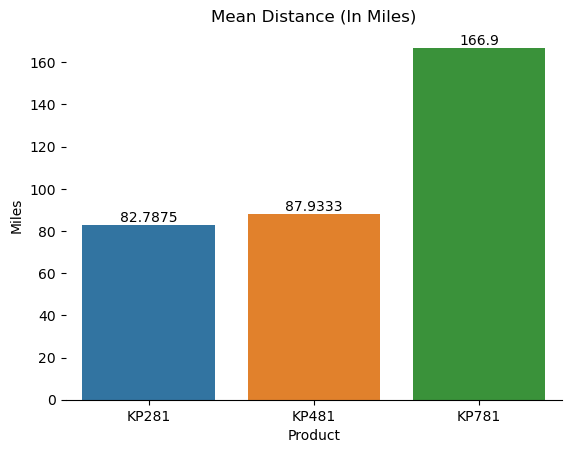

In [29]:
ax =sns.barplot(y= 'Miles', x= 'Product', data = df, ci = None);
for i in ax.containers:
    ax.bar_label(i)
plt.title('Mean Distance (In Miles)');
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['left'].set_visible(False);

Observation: KP 281 and KP 481 customers are expected to run/walk similar distance of around 85 miles while its almost double for KP781.

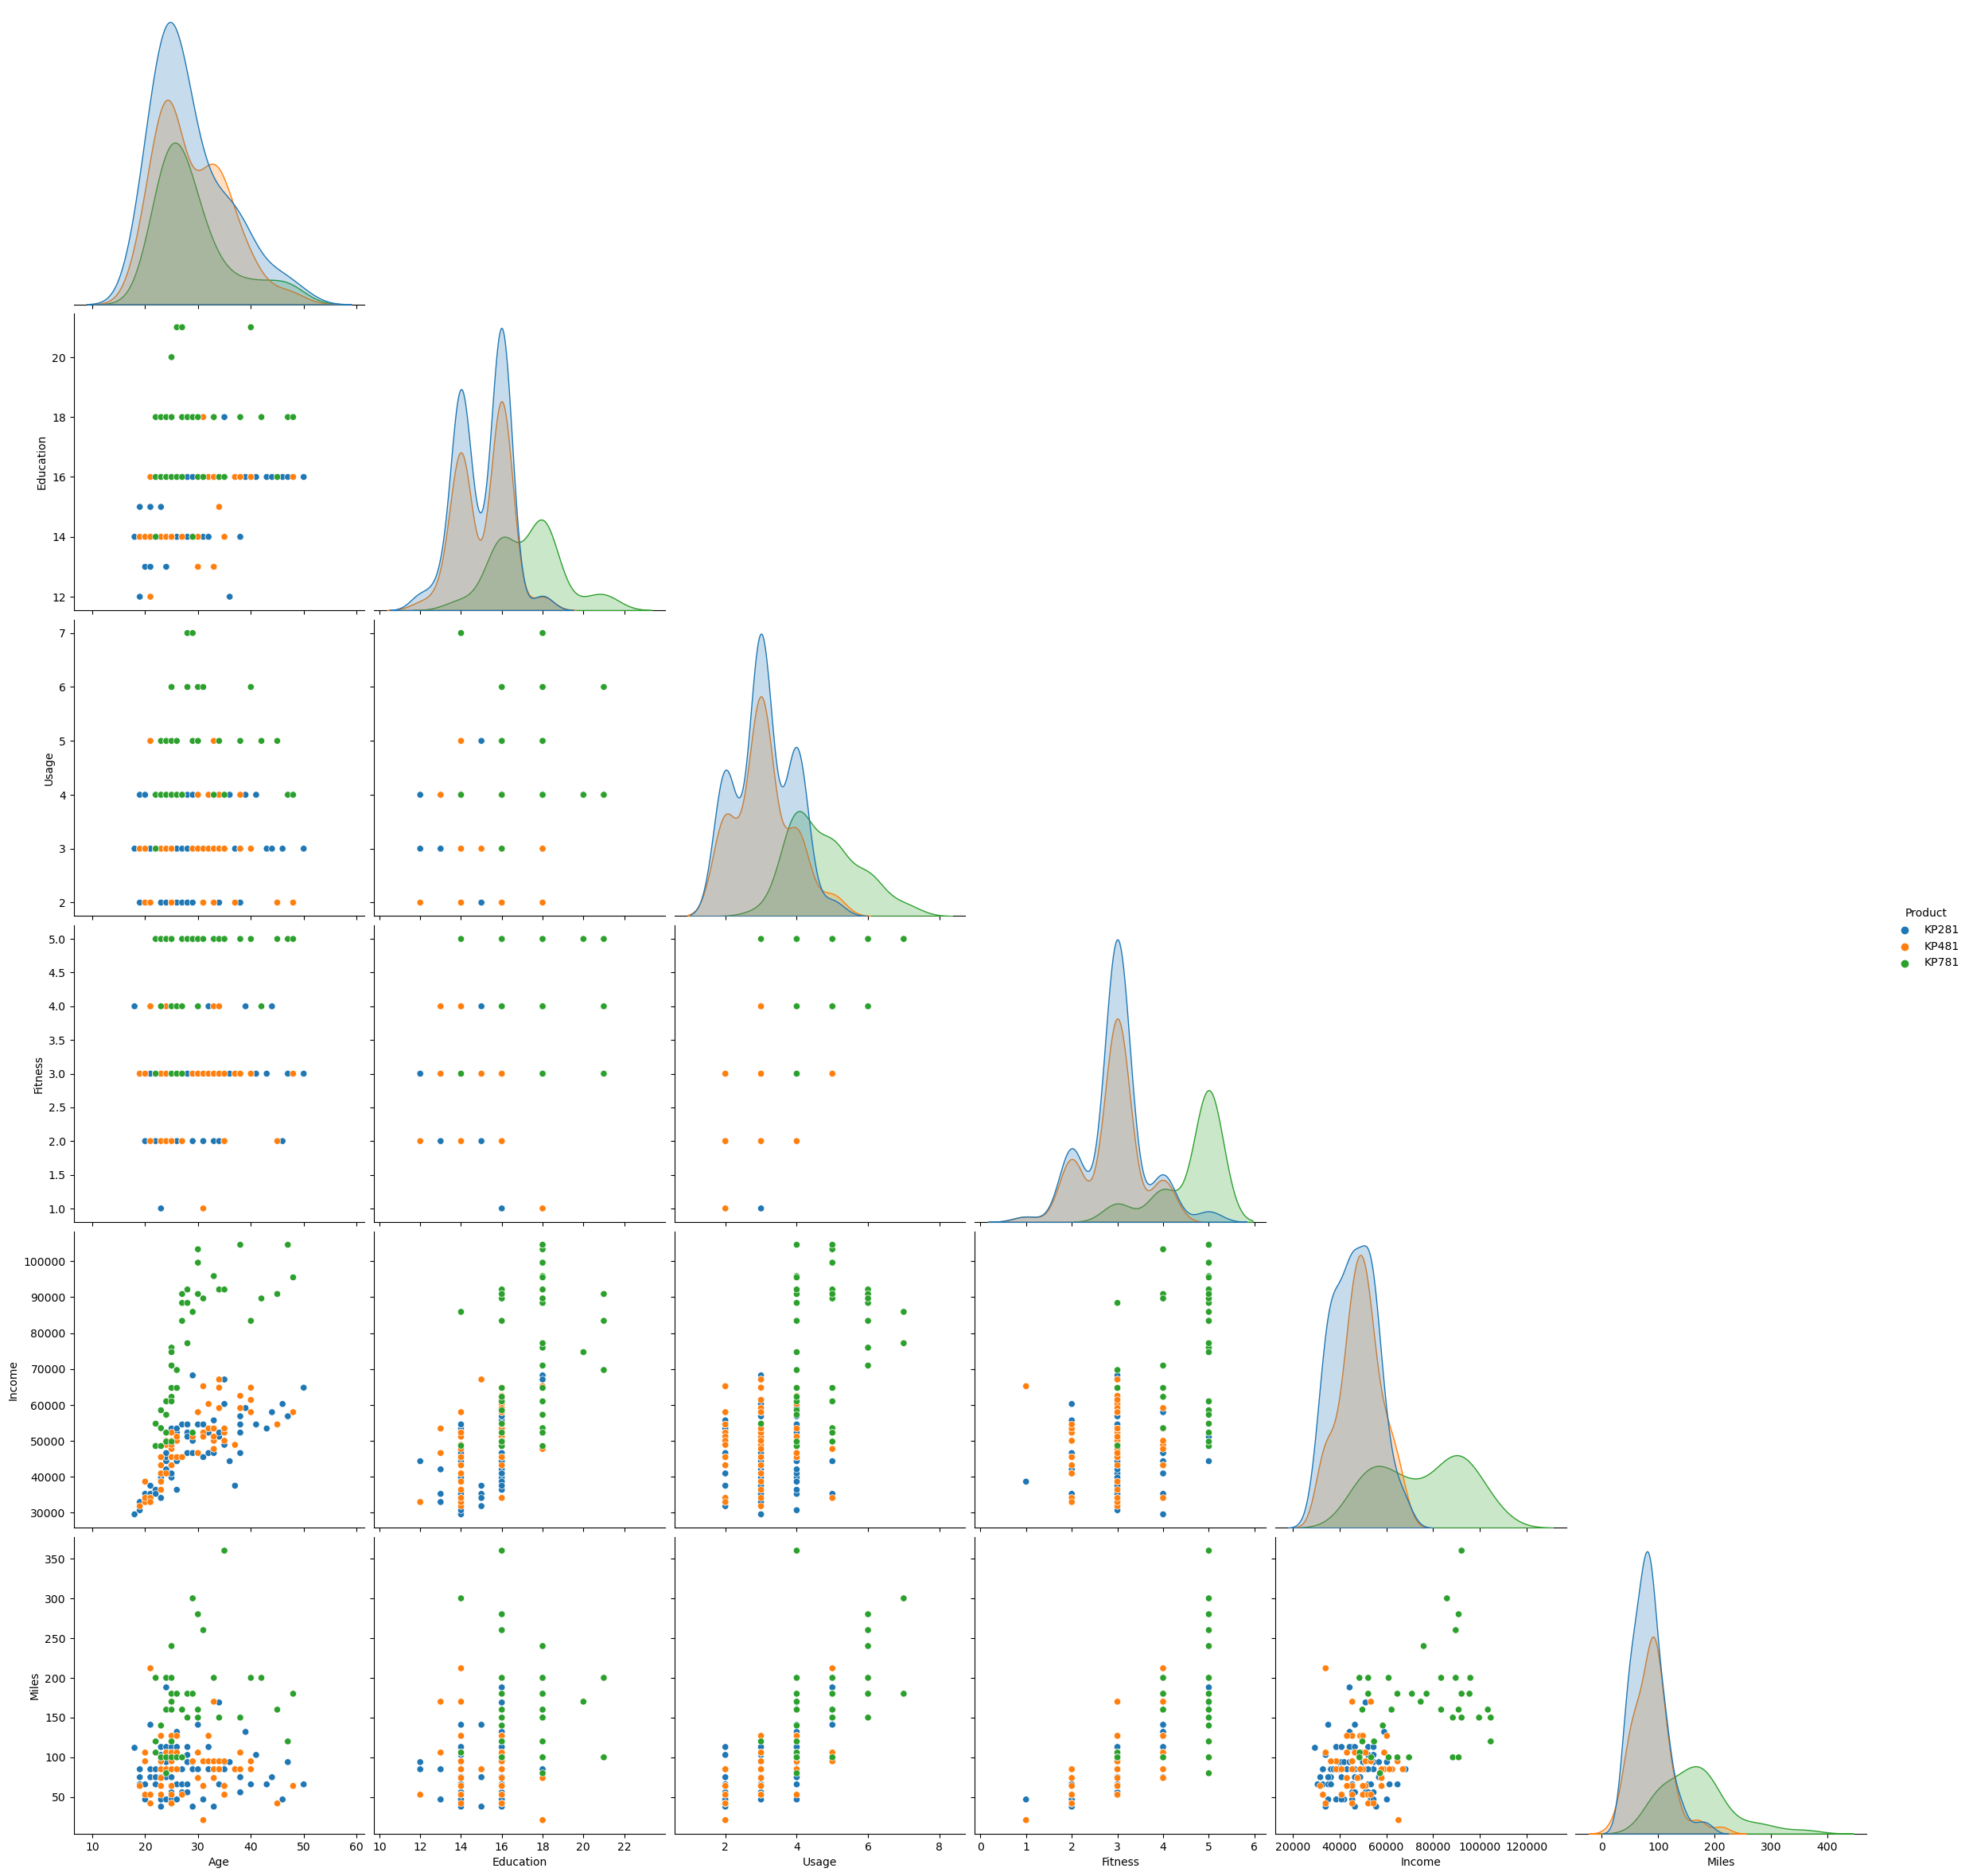

In [34]:
sns.pairplot(data = df, hue = 'Product', corner= True, height = 4);

Observation:
 General Trend in the scatterplot can be seen if move from one point to other from left to right showing positive relationship between the variables. But its not clear what 
We'll interpret the results by using Correlation and Heatmap below.

In [36]:
correlation_matrix = df.corr()

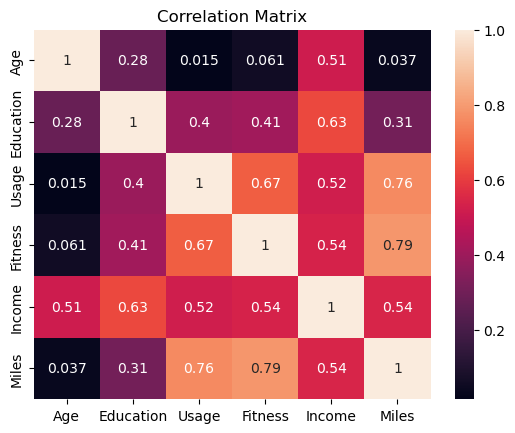

In [37]:
sns.heatmap(correlation_matrix, annot = True);
plt.title('Correlation Matrix');

Observation:
1. Age and Education, have a weak positive correlation (less than 0.4) with every other variable except for Income.
2. Income has moderate positive relationship with the other variable.
3. Fitness, Usage and Miles have strong positive correlation with each other.

Now, we'll try to answer a few questions which should help the company understand customers.

In [38]:
pd.crosstab(index = df['Gender'], columns= df['Product'], normalize = True, margins = True, margins_name = 'Probability')

Product,KP281,KP481,KP781,Probability
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
Probability,0.444444,0.333333,0.222222,1.000000


Given the above table, we can observe Marginal Probability of picking a Female customer from our data is 0.42 and that of male is 0.58.
Similarly, Marginal Probability of customer who has bought KP281 is 0.44, KP481 is 0.33 and KP781 is 0.22.
Joint Probabilities show us that picking a male who has bought either of KP 281 and KP 481 is almost the same as picking a female who has bought either one of these. But Female is less likely to buy a KP 781 than a Male.


In [39]:
pd.crosstab(index = df['MaritalStatus'], columns= df['Product'], normalize = True, margins = True, margins_name = 'Probability')

Product,KP281,KP481,KP781,Probability
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
Probability,0.444444,0.333333,0.222222,1.000000


The above table also highlights that we have more customers who have a Partner than those who are single. Partenered customers prefer KP 281 the most followed by KP 481 and then KP 781. The same trend is followed by Single customers.

Lets now try to do the same with the numerical variables. We'll have to add more columns to our data in this case.

In [59]:
age_group = []
for i in df.Age:
    if i < 30:
        age_group.append('young')
    elif 30 <= i < 40:
        age_group.append('middle aged')
    else:
        age_group.append('old')
df['Age_Group'] = age_group

In [60]:
education_group = []
for i in df.Education:
    if i < 14:
        education_group.append('less educated')
    elif 14 <= i < 18:
        education_group.append('medium educated')
    else:
        education_group.append('high educated')
df['Education_Group'] = education_group

In [61]:
income_group = []
for i in df.Income:
    if i < 35000:
        income_group.append('bottom tier')
    elif 35000 <= i < 60000:
        income_group.append('middle tier')
    else:
        income_group.append('top tier')
df['Income_Group'] = income_group

In [66]:
user_group = []
for i in df.Usage:
    if i <= 2:
        user_group.append('less use')
    elif 2 < i <= 4:
        user_group.append('medium use')
    else:
        user_group.append('high use')
df['User_Group']= user_group

In [63]:
fitness_level = []
for i in df.Fitness:
    if i <= 2:
        fitness_level.append('low')
    elif i == 3:
        fitness_level.append('medium')
    else:
        fitness_level.append('high')
df['Fitness_Level']= fitness_level

In [64]:
distance_group = []
for i in df.Miles:
    if i < 100:
        distance_group.append('less distance')
    elif 100 <= i <= 200:
        distance_group.append('medium distance')
    else:
        distance_group.append('high distance')
df['Distance_Group'] = distance_group
        

In [67]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Education_Group,User_Group,Fitness_Level,Distance_Group,Income_Group
0,KP281,18,Male,14,Single,3,4,29562,112,young,medium educated,medium use,high,medium distance,bottom tier
1,KP281,19,Male,15,Single,2,3,31836,75,young,medium educated,less use,medium,less distance,bottom tier
2,KP281,19,Female,14,Partnered,4,3,30699,66,young,medium educated,medium use,medium,less distance,bottom tier
3,KP281,19,Male,12,Single,3,3,32973,85,young,less educated,medium use,medium,less distance,bottom tier
4,KP281,20,Male,13,Partnered,4,2,35247,47,young,less educated,medium use,low,less distance,middle tier


Let's now compute marginal and joint probabilites. First we define a function to save time.

In [68]:
def get_probabilities(column_name):
    return pd.crosstab(index = df[column_name], columns= df['Product'], normalize = True, margins = True, margins_name = 'Probability')

In [70]:
columns = [i for i in df.columns if i not in {'Product', 'Gender', 'MaritalStatus', 'Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles'}]

In [73]:
tables = []
for i in columns:
    tables.append(get_probabilities(i))

In [77]:
tables[0]

Product,KP281,KP481,KP781,Probability
Age_Group,,,,
middle aged,0.111111,0.122222,0.044444,0.277778
old,0.038889,0.027778,0.027778,0.094444
young,0.294444,0.183333,0.150000,0.627778
Probability,0.444444,0.333333,0.222222,1.000000


##### The above table gives us Marginal and Joint probabilities related to Age Group and Product type.

##### We can utilize this to answer some business questions. Let's say we're given the age of a customer, we have to compute the probabilities of each product type.

##### Here's how we can compute:

In [87]:
for i in range(len(tables[0].index) - 1):
    for j in range(len(tables[0].columns) - 1):
        conditional_prob = tables[0].iloc[i, j] / tables[0].iloc[i, -1]  # Use -1 to access the 'Probability' column
        print(f'P({tables[0].columns[j]}/{tables[0].index[i]})', round(conditional_prob, 2))

P(KP281/middle aged) 0.4
P(KP481/middle aged) 0.44
P(KP781/middle aged) 0.16
P(KP281/old) 0.41
P(KP481/old) 0.29
P(KP781/old) 0.29
P(KP281/young) 0.47
P(KP481/young) 0.29
P(KP781/young) 0.24


##### Given that a customer is old, there is 29% chance that they will buy a KP781, 41% chance that they will buy KP281 and 29% chance they will buy a KP481.

##### Given that a customer is middle aged, there is 16% chance that they will buy a KP781, 40% chance that they will buy KP281 and 44% chance they will buy a KP481.

##### Given that a customer is young, there is 24% chance that they will buy a KP781, 47% chance that they will buy KP281 and 29% chance they will buy a KP481.

We'll use the same code to find these probabilities and insights with other tables.

In [99]:
tables[1]

Product,KP281,KP481,KP781,Probability
Education_Group,,,,
high educated,0.011111,0.011111,0.127778,0.150000
less educated,0.027778,0.016667,0.000000,0.044444
medium educated,0.405556,0.305556,0.094444,0.805556
Probability,0.444444,0.333333,0.222222,1.000000


In [90]:
for i in range(len(tables[1].index) - 1):
    for j in range(len(tables[1].columns) - 1):
        conditional_prob = tables[1].iloc[i, j] / tables[1].iloc[i, -1]  # Use -1 to access the 'Probability' column
        print(f'P({tables[1].columns[j]}/{tables[1].index[i]})', round(conditional_prob, 2))

P(KP281/high educated) 0.07
P(KP481/high educated) 0.07
P(KP781/high educated) 0.85
P(KP281/less educated) 0.62
P(KP481/less educated) 0.38
P(KP781/less educated) 0.0
P(KP281/medium educated) 0.5
P(KP481/medium educated) 0.38
P(KP781/medium educated) 0.12


##### Given that a customer is high educated, there is 85% chance that they will buy a KP781, 7% chance that they will buy KP281 and 7% chance they will buy a KP481.

##### Given that a customer is less educated, there is none percent chance that they will buy a KP781, 62% chance that they will buy KP281 and 38% chance they will buy a KP481.

##### Given that a customer is medium educated, there is 12% chance that they will buy a KP781, 50% chance that they will buy KP281 and 12% chance they will buy a KP481.

In [91]:
tables[2]

Product,KP281,KP481,KP781,Probability
User_Group,,,,
high use,0.011111,0.016667,0.116667,0.144444
less use,0.105556,0.077778,0.000000,0.183333
medium use,0.327778,0.238889,0.105556,0.672222
Probability,0.444444,0.333333,0.222222,1.000000


In [92]:
for i in range(len(tables[2].index) - 1):
    for j in range(len(tables[2].columns) - 1):
        conditional_prob = tables[2].iloc[i, j] / tables[2].iloc[i, -1]  # Use -1 to access the 'Probability' column
        print(f'P({tables[2].columns[j]}/{tables[2].index[i]})', round(conditional_prob, 2))

P(KP281/high use) 0.08
P(KP481/high use) 0.12
P(KP781/high use) 0.81
P(KP281/less use) 0.58
P(KP481/less use) 0.42
P(KP781/less use) 0.0
P(KP281/medium use) 0.49
P(KP481/medium use) 0.36
P(KP781/medium use) 0.16


##### Given that a customer usage is high, there is 81% chance that they will buy a KP781, 8% chance that they will buy KP281 and 12% chance they will buy a KP481.

##### Given that a customer usage is less, there is none percent chance that they will buy a KP781, 58% chance that they will buy KP281 and 42% chance they will buy a KP481.

##### Given that a customer usage is medium, there is 16% chance that they will buy a KP781, 49% chance that they will buy KP281 and 36% chance they will buy a KP481.

In [93]:
tables[3]

Product,KP281,KP481,KP781,Probability
Fitness_Level,,,,
high,0.061111,0.044444,0.200000,0.305556
low,0.083333,0.072222,0.000000,0.155556
medium,0.300000,0.216667,0.022222,0.538889
Probability,0.444444,0.333333,0.222222,1.000000


In [94]:
for i in range(len(tables[3].index) - 1):
    for j in range(len(tables[3].columns) - 1):
        conditional_prob = tables[3].iloc[i, j] / tables[3].iloc[i, -1]  # Use -1 to access the 'Probability' column
        print(f'P({tables[3].columns[j]}/{tables[3].index[i]})', round(conditional_prob, 2))

P(KP281/high) 0.2
P(KP481/high) 0.15
P(KP781/high) 0.65
P(KP281/low) 0.54
P(KP481/low) 0.46
P(KP781/low) 0.0
P(KP281/medium) 0.56
P(KP481/medium) 0.4
P(KP781/medium) 0.04


##### Given that a customer fitness  is high, there is 65% chance that they will buy a KP781, 20% chance that they will buy KP281 and 15% chance they will buy a KP481.

##### Given that a customer fitness is low, there is none percent chance that they will buy a KP781, 54% chance that they will buy KP281 and 46% chance they will buy a KP481.

##### Given that a customer fitness is medium, there is 4% chance that they will buy a KP781, 56% chance that they will buy KP281 and 40% chance they will buy a KP481.

In [95]:
tables[4]

Product,KP281,KP481,KP781,Probability
Distance_Group,,,,
high distance,0.000000,0.005556,0.027778,0.033333
less distance,0.344444,0.244444,0.005556,0.594444
medium distance,0.100000,0.083333,0.188889,0.372222
Probability,0.444444,0.333333,0.222222,1.000000


In [96]:
for i in range(len(tables[4].index) - 1):
    for j in range(len(tables[4].columns) - 1):
        conditional_prob = tables[4].iloc[i, j] / tables[4].iloc[i, -1]  # Use -1 to access the 'Probability' column
        print(f'P({tables[4].columns[j]}/{tables[4].index[i]})', round(conditional_prob, 2))

P(KP281/high distance) 0.0
P(KP481/high distance) 0.17
P(KP781/high distance) 0.83
P(KP281/less distance) 0.58
P(KP481/less distance) 0.41
P(KP781/less distance) 0.01
P(KP281/medium distance) 0.27
P(KP481/medium distance) 0.22
P(KP781/medium distance) 0.51


##### Given that expected distance is high, there is 83% chance that they will buy a KP781, none percent chance that they will buy KP281 and 17% chance they will buy a KP481.

##### Given that expected distance is low, there is 1% chance that they will buy a KP781, 58% chance that they will buy KP281 and 41% chance they will buy a KP481.

##### Given that expected distance is medium, there is 51% chance that they will buy a KP781, 27% chance that they will buy KP281 and 22% chance they will buy a KP481.

In [97]:
tables[5]

Product,KP281,KP481,KP781,Probability
Income_Group,,,,
bottom tier,0.044444,0.033333,0.000000,0.077778
middle tier,0.366667,0.261111,0.061111,0.688889
top tier,0.033333,0.038889,0.161111,0.233333
Probability,0.444444,0.333333,0.222222,1.000000


In [98]:
for i in range(len(tables[5].index) - 1):
    for j in range(len(tables[5].columns) - 1):
        conditional_prob = tables[5].iloc[i, j] / tables[5].iloc[i, -1]  # Use -1 to access the 'Probability' column
        print(f'P({tables[5].columns[j]}/{tables[5].index[i]})', round(conditional_prob, 2))

P(KP281/bottom tier) 0.57
P(KP481/bottom tier) 0.43
P(KP781/bottom tier) 0.0
P(KP281/middle tier) 0.53
P(KP481/middle tier) 0.38
P(KP781/middle tier) 0.09
P(KP281/top tier) 0.14
P(KP481/top tier) 0.17
P(KP781/top tier) 0.69


##### Given that a customer is in top tier, there is 69% chance that they will buy a KP781, 14% chance that they will buy KP281 and 17% chance they will buy a KP481.

##### Given that a customer is in middle tier, there is 9% chance that they will buy a KP781, 53% chance that they will buy KP281 and 38% chance they will buy a KP481.

##### Given that a customer is in bottom tier, there is none percent chance that they will buy a KP781, 57% chance that they will buy KP281 and 43% chance they will buy a KP481.

#### Recommendations:

##### 1. For KP 281, we have seen that factors such as Fitness (self-rated), Usage (expected), Distance covered, Income, Education if Low then their are high chances of purchase. On the other hand, if these factors are high, then chances of purchase are very less.

##### 2. For KP 781, we have seen that the above factors plays important role, i.e. if the above factors are high, then there are high chances that customer will choose KP 781.

##### 3. For KP 481, customer preference is similar to KP 281 but chances are less extreme. 